In [183]:
import random, time
import numpy as np
import matplotlib.pyplot as plt

In [184]:
init = open('lexicon/centinal.txt').readlines()

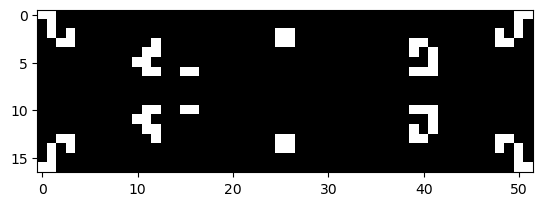

In [185]:
height = len(init)
for k in init: width = len(k)

matrix = np.zeros([height, width])

for row, line in enumerate(init):
    for col, char in enumerate(line.strip()):
        if char == '.':
            matrix[row, col] = 0
        else:
            matrix[row, col] = 1

plt.imshow(matrix, cmap='gray')

In [186]:
next_state = np.copy(matrix)

(17, 52)


([], [])

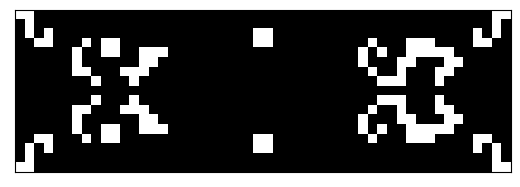

In [195]:
steps = 1

for step in range(steps):
    state = np.copy(next_state)
    for yid, y in enumerate(state):
            for xid, x in enumerate(y):

                # Co-ordinates
                n = state[yid-1][xid] if yid-1 >= 0 else 0.0
                s = state[yid+1][xid] if yid+1 < state.shape[0] else 0.0
                e = state[yid][xid+1] if xid+1 < state.shape[1] else 0.0
                w = state[yid][xid-1] if xid-1 >= 0 else 0.0
                ne = state[yid-1][xid+1] if yid-1 >= 0 and xid+1 < state.shape[1] else 0.0
                nw = state[yid-1][xid-1] if yid-1 >= 0 and xid-1 >= 0 else 0.0
                se = state[yid+1][xid+1] if yid+1 < state.shape[0] and xid+1 < state.shape[1] else 0.0
                sw = state[yid+1][xid-1] if yid+1 < state.shape[0] and xid-1 >= 0 else 0.0

                # Sum neighbours
                neighbours = np.sum([n, s, e, w, ne, nw, se, sw])

                # Game of Life - Update State
                if state[yid, xid] == 0 and neighbours == 3: # Reproduction
                    next_state[yid, xid] = 1
                elif state[yid, xid] == 1 and neighbours < 2: # Underpopulation
                    next_state[yid, xid] = 0
                elif state[yid, xid] == 1 and neighbours > 3: # Overpopulation
                    next_state[yid, xid] = 0
                elif state[yid, xid] == 1 and neighbours == 2 or neighbours == 3: # Next Generation
                    next_state[yid, xid] = 1
                else:
                    next_state[yid, xid] = 0 # Clear
                
    break

print(next_state.shape)

plt.imshow(next_state, cmap='gray')
plt.xticks([])
plt.yticks([])